# CMR and CMR-STAC API
*Contributed by: TODO: credit where this came from*

# 1. Getting Started <a id="getstarted"></a>

## 1.1 Import Packages <a id="1.1"></a>
#### Import the required packages and set the input/working directory to run this Jupyter Notebook locally.

In [2]:
import requests as r
from skimage import io
import matplotlib.pyplot as plt

---
# 2. Navigating the CMR-STAC API <a id="navigatestac"></a>
#### Learn about navigating NASA's Common Metadata Repository (CMR) SpatioTemporal Asset Catalog ([STAC](https://stacspec.org/)) API.  

## 2.1 Introduction to the CMR-STAC API <a id="2.1"></a>
### What is STAC?
> STAC is a specification that provides a common language for interpreting geospatial information in order to standardize indexing and discovering data. 
### Four STAC Specifications:
1. [STAC API](https://github.com/radiantearth/stac-api-spec)  
2. [STAC Catalog](https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md)  
3. [STAC Collection](https://github.com/radiantearth/stac-spec/blob/master/collection-spec/collection-spec.md)  
4. [STAC Item](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md)  
#### In the section below, we will walk through an example of each specification. For additional information, check out: https://stacspec.org/. 

### 1. STAC API: Endpoint that enables the querying of STAC items.
#### Below, set the CMR-STAC API Endpoint to a variable, and use the `requests` package to send a GET request to the endpoint, and set the response to a variable.

In [3]:
stac = 'https://cmr.earthdata.nasa.gov/stac/' # CMR-STAC API Endpoint
stac_response = r.get(stac).json()            # Call the STAC API endpoint
for s in stac_response: print(s)

id
title
stac_version
type
description
links


In [4]:
print(f"You are now using the {stac_response['id']} API (STAC Version: {stac_response['stac_version']}). {stac_response['description']}")
print(f"There are {len(stac_response['links'])} STAC catalogs available in CMR.")

You are now using the stac API (STAC Version: 1.0.0). This is the landing page for CMR-STAC. Each provider link contains a STAC endpoint.
There are 46 STAC catalogs available in CMR.


#### You will notice above that the CMR-STAC API contains many different endpoints--not just from NASA LP DAAC, but also contains endpoints for other NASA ESDIS DAACs.
### 2. STAC Catalog: Contains a JSON file of links that organize all of the collections available. 
#### Below, search for LP DAAC Catalogs, and print the information contained in the Catalog that we will be using today, `LPCLOUD`.

In [5]:
stac_lp = [s for s in stac_response['links'] if 'LP' in s['title']]  # Search for only LP-specific catalogs

# LPCLOUD is the STAC catalog we will be using and exploring today
lp_cloud = r.get([s for s in stac_lp if s['title'] == 'LPCLOUD'][0]['href']).json()
for l in lp_cloud: print(f"{l}: {lp_cloud[l]}")

id: LPCLOUD
title: LPCLOUD
description: Root catalog for LPCLOUD
type: Catalog
stac_version: 1.0.0
links: [{'rel': 'self', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD', 'title': 'Provider catalog', 'type': 'application/json'}, {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/', 'title': 'Root catalog', 'type': 'application/json'}, {'rel': 'collections', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections', 'title': 'Provider Collections', 'type': 'application/json'}, {'rel': 'search', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search', 'title': 'Provider Item Search', 'type': 'application/geo+json', 'method': 'GET'}, {'rel': 'search', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search', 'title': 'Provider Item Search', 'type': 'application/geo+json', 'method': 'POST'}, {'rel': 'conformance', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/conformance', 'title': 'Conformance Classes', 'type': 'application/geo+json'}, {'rel': 'ser

#### Below, print the links contained in the LP CLOUD STAC Catalog:

In [6]:
lp_links = lp_cloud['links']
for l in lp_links: 
    try: 
        print(f"{l['href']} is the {l['title']}")
    except:
        print(f"{l['href']}")       

https://cmr.earthdata.nasa.gov/stac/LPCLOUD is the Provider catalog
https://cmr.earthdata.nasa.gov/stac/ is the Root catalog
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections is the Provider Collections
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search is the Provider Item Search
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/search is the Provider Item Search
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/conformance is the Conformance Classes
https://api.stacspec.org/v1.0.0-beta.1/openapi.yaml is the OpenAPI Doc
https://api.stacspec.org/v1.0.0-beta.1/index.html is the HTML documentation
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/ASTGTM.v003
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v1.5
https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5


### 3. STAC Collection: Extension of STAC Catalog containing additional information that describe the STAC Items in that Collection.
#### Below, get a response from the LPCLOUD Collection and print the information included in the response.

In [7]:
lp_collections = [l['href'] for l in lp_links if l['rel'] == 'collections'][0]  # Set collections endpoint to variable
collections_response = r.get(f"{lp_collections}").json()                        # Call collections endpoint
print(f"This collection contains {collections_response['description']} ({len(collections_response['collections'])} available)")

This collection contains All collections provided by LPCLOUD (3 available)


#### As of March 3, 2021, there are three collections available, and more will be added in the future. 
#### Print out one of the collections:

In [8]:
collections = collections_response['collections']
collections[1]

{'id': 'HLSL30.v1.5',
 'stac_version': '1.0.0',
 'license': 'not-provided',
 'title': 'HLS Operational Land Imager Surface Reflectance and TOA Brightness Daily Global 30 m V1.5',
 'type': 'Collection',
 'description': 'PROVISIONAL - The Harmonized Landsat and Sentinel-2 (HLS) project provides consistent surface reflectance (SR) and top of atmosphere (TOA) brightness data from the Operational Land Imager (OLI) aboard the joint NASA/USGS Landsat 8 satellite and the Multi-Spectral Instrument (MSI) aboard Europe’s Copernicus Sentinel-2A and Sentinel-2B satellites. The combined measurement enables global observations of the land every 2–3 days at 30-meter (m) spatial resolution. The HLS project uses a set of algorithms to obtain seamless products from OLI and MSI that include atmospheric correction, cloud and cloud-shadow masking, spatial co-registration and common gridding, illumination and view angle normalization, and spectral bandpass adjustment. \r\n\r\nThe HLSL30 product provides 30-m

#### In CMR, `id` is used to query by a specific product, so be sure to save the ID for the HLS S30 and L30 V1.5 products below:

In [9]:
# Search available collections for HLS and print them out
hls_collections = [c for c in collections if 'HLS' in c['title']]
for h in hls_collections: print(f"{h['title']} has an ID (shortname) of: {h['id']}")

HLS Operational Land Imager Surface Reflectance and TOA Brightness Daily Global 30 m V1.5 has an ID (shortname) of: HLSL30.v1.5
HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance Daily Global 30 m V1.5 has an ID (shortname) of: HLSS30.v1.5


> #### Note that the "id" shortname is in the format: productshortname.vVVV (where VVV = product version)

#### Explore the attributes contained in the HLSS30 Collection.

In [10]:
s30 = [h for h in hls_collections if h['id'] == 'HLSS30.v1.5'][0]  # Grab HLSS30 collection
for s in s30['extent']: print(f"{s}: {s30['extent'][s]}")          # Check out the extent of this collection

crs: http://www.opengis.net/def/crs/OGC/1.3/CRS84
spatial: {'bbox': [[-180, -90, 180, 90]]}
trs: http://www.opengis.net/def/uom/ISO-8601/0/Gregorian
temporal: {'interval': [['2014-04-03T00:00:00.000Z', None]]}


#### So here we can see that the extent is global, and can also see the temporal range--where "None" means on-going or to present.

In [11]:
print(f"HLS S30 Start Date is: {s30['extent']['temporal']['interval'][0][0]}")
s30_id = s30['id']

HLS S30 Start Date is: 2014-04-03T00:00:00.000Z


#### Next, explore the attributes of the HLSL30 collection.

In [12]:
l30 = [h for h in hls_collections if h['id'] == 'HLSL30.v1.5'][0]     # Grab HLSL30 collection
for l in l30['extent']: print(f"{l}: {l30['extent'][l]}")             # Check out the extent of this collection
print(f"HLS L30 Start Date is: {l30['extent']['temporal']['interval'][0][0]}")
l30_id = l30['id']

crs: http://www.opengis.net/def/crs/OGC/1.3/CRS84
spatial: {'bbox': [[-180, -90, 180, 90]]}
trs: http://www.opengis.net/def/uom/ISO-8601/0/Gregorian
temporal: {'interval': [['2013-04-11T00:00:00.000Z', None]]}
HLS L30 Start Date is: 2013-04-11T00:00:00.000Z


#### Above, notice that the L30 product has a different start date than the S30 product. 

### 4. STAC Item: Represents data and metadata assets that are spatiotemporally coincident
#### Below, query the HLSS30 collection for items and return the first item in the collection. 

In [13]:
# Below, go through all links in the collection and return the link containing the items endpoint
s30_items = [s['href'] for s in s30['links'] if s['rel'] == 'items'][0]  # Set items endpoint to variable
s30_items

'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5/items'

In [14]:
s30_items_response = r.get(f"{s30_items}").json()                        # Call items endpoint
s30_item = s30_items_response['features'][0]                             # select first item (10 items returned by default)
s30_item

{'type': 'Feature',
 'id': 'G1969487860-LPCLOUD',
 'stac_version': '1.0.0',
 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
 'collection': 'HLSS30.v1.5',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-119.1488671, 33.3327671],
    [-118.9832795, 33.3355226],
    [-118.6783731, 34.3301598],
    [-119.1737801, 34.3223655],
    [-119.1488671, 33.3327671]]]},
 'bbox': [-119.17378, 33.332767, -118.678373, 34.33016],
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5/items/G1969487860-LPCLOUD'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSS30.v1.5'},
  {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'},
  {'rel': 'provider', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'},
  {'rel': 'via',
   'href': 'https://cmr.earthdata.nas

#### STAC metadata provides valuable information on the item, including a unique ID, when it was acquired, the location of the observation, and a cloud cover assessment.  

In [15]:
# Print metadata attributes from this observation
print(f"The ID for this item is: {s30_item['id']}")
print(f"It was acquired on: {s30_item['properties']['datetime']}")
print(f"over: {s30_item['bbox']} (Lower Left, Upper Right corner coordinates)")
print(f"It contains {len(s30_item['assets'])} assets")
print(f"and is {s30_item['properties']['eo:cloud_cover']}% cloudy.")

The ID for this item is: G1969487860-LPCLOUD
It was acquired on: 2015-08-26T18:54:35.450Z
over: [-119.17378, 33.332767, -118.678373, 34.33016] (Lower Left, Upper Right corner coordinates)
It contains 20 assets
and is 6% cloudy.


#### Below, print out the ten items and the percent cloud cover--we will use this to decide which item to visualize in the next section. 

In [16]:
for i, s in enumerate(s30_items_response['features']):
    print(f"Item at index {i} is {s['properties']['eo:cloud_cover']}% cloudy.")

Item at index 0 is 6% cloudy.
Item at index 1 is 4% cloudy.
Item at index 2 is 0% cloudy.
Item at index 3 is 64% cloudy.
Item at index 4 is 0% cloudy.
Item at index 5 is 39% cloudy.
Item at index 6 is 74% cloudy.
Item at index 7 is 100% cloudy.
Item at index 8 is 30% cloudy.
Item at index 9 is 67% cloudy.


#### Using the information printed above, set the `item_index` below to whichever observation is the least cloudy above.

In [17]:
item_index = 9  # Indexing starts at 0 in Python, so here select the eighth item in the list at index 7

In [18]:
s30_item = s30_items_response['features'][item_index]  # Grab the next item in the list

print(f"The ID for this item is: {s30_item['id']}")
print(f"It was acquired on: {s30_item['properties']['datetime']}")
print(f"over: {s30_item['bbox']} (Lower Left, Upper Right corner coordinates)")
print(f"It contains {len(s30_item['assets'])} assets")
print(f"and is {s30_item['properties']['eo:cloud_cover']}% cloudy.")

The ID for this item is: G2010287698-LPCLOUD
It was acquired on: 2016-11-06T08:21:39.880Z
over: [24.875464, -26.295042, 25.108568, -25.427554] (Lower Left, Upper Right corner coordinates)
It contains 20 assets
and is 67% cloudy.


#### Below, print out the names of all of the assets included in this item.

In [19]:
print("The following assets are available for download:")
for a in s30_item['assets']: print(a)

The following assets are available for download:
SZA
B01
VAA
SAA
B10
B8A
B05
B09
Fmask
B02
B12
B11
B03
B06
B04
B08
VZA
B07
browse
metadata


#### Notice that each HLS item includes a browse image. Read the browse file into memory and visualize the HLS acquisition.

In [20]:
s30_item['assets']['browse']

{'title': 'Download HLS.S30.T35JKM.2016311T080122.v1.5.jpg',
 'href': 'https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T35JKM.2016311T080122.v1.5.jpg',
 'type': 'image/jpeg'}

#### Use the `skimage` package to load the browse image into memory and `matplotlib` to quickly visualize it.

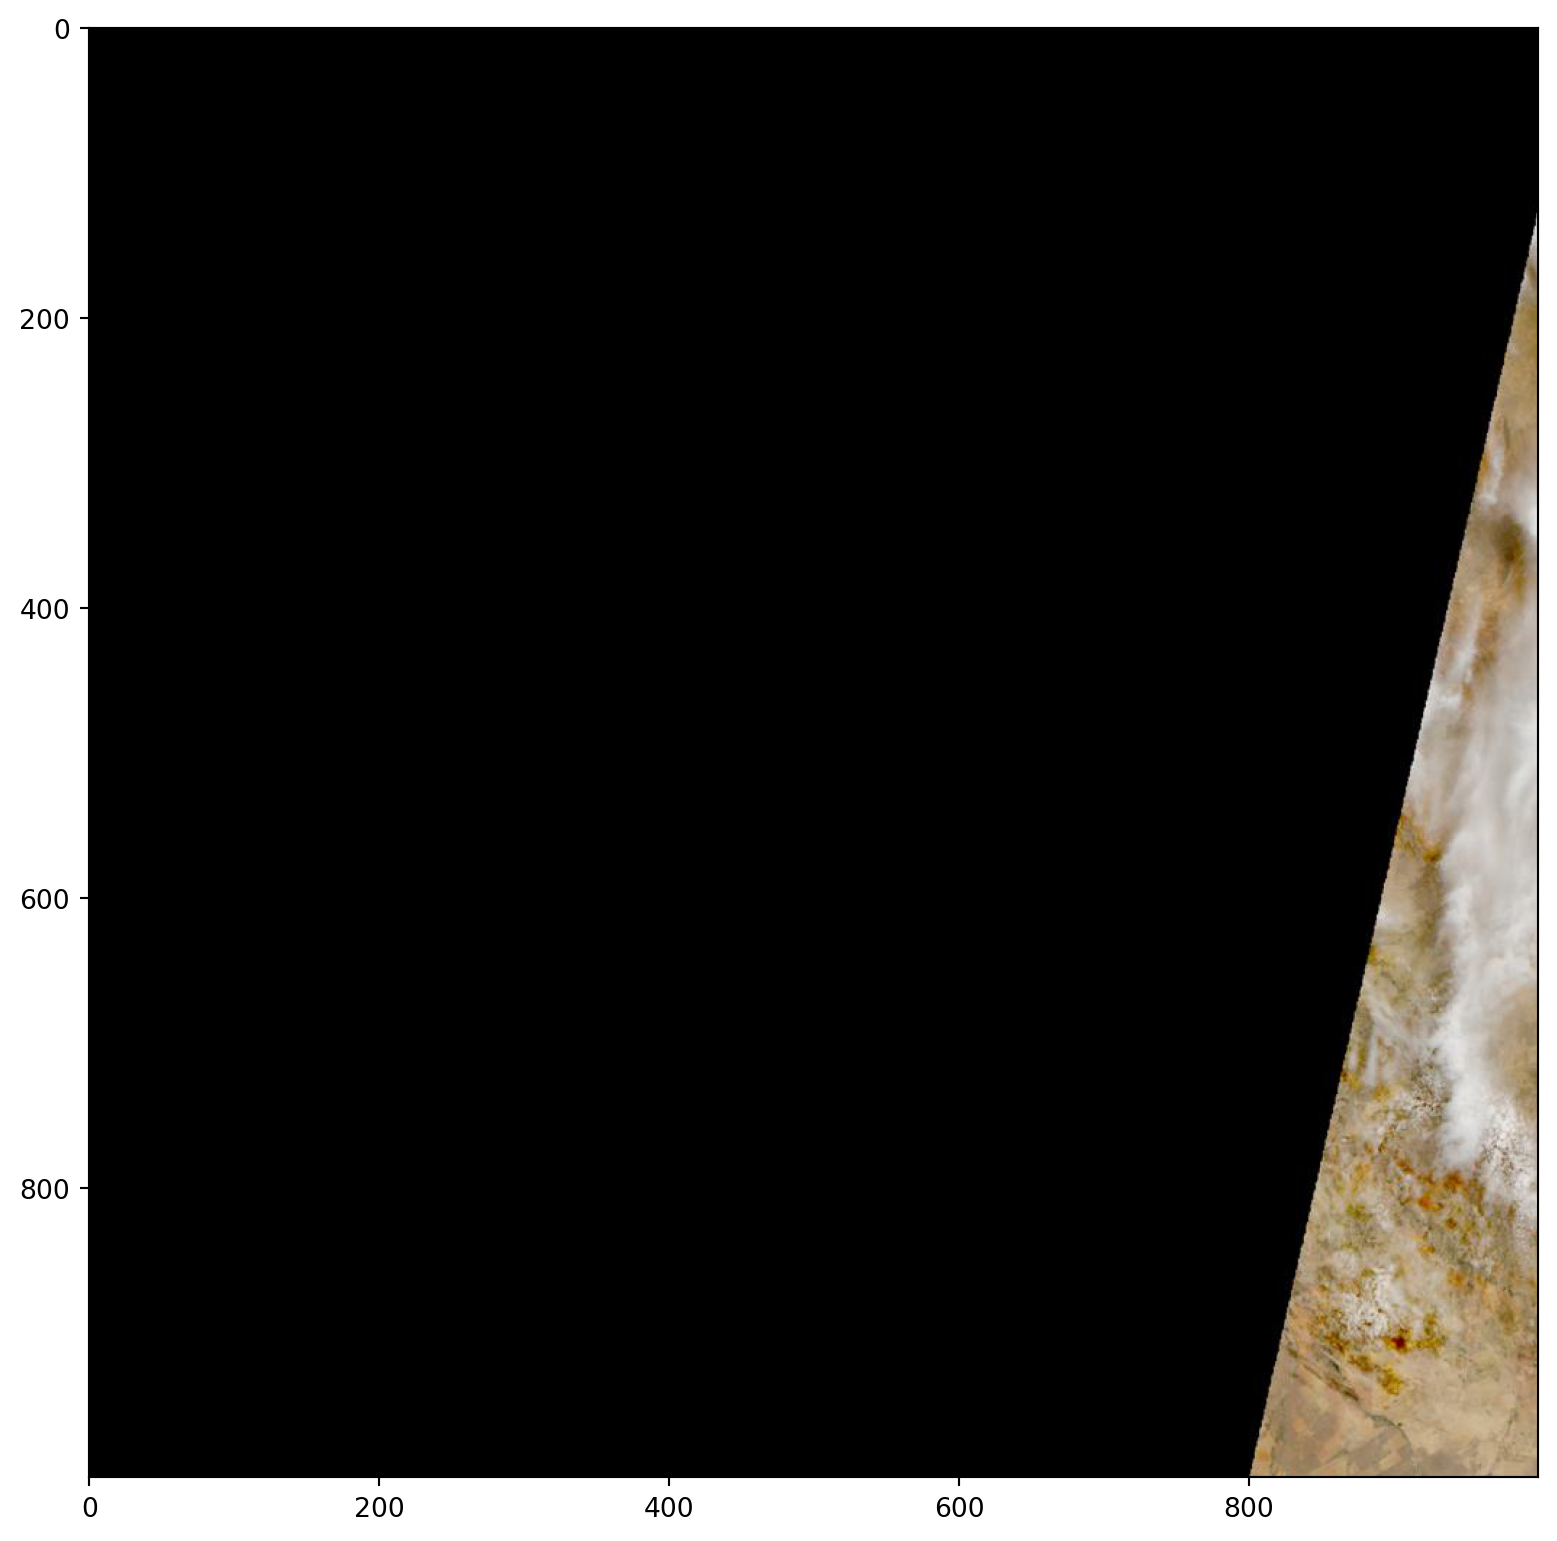

In [21]:
image = io.imread(s30_item['assets']['browse']['href'])  # Load jpg browse image into memory

# Basic plot of the image
plt.figure(figsize=(10,10))              
plt.imshow(image)
plt.show()

#### Congrats! You have visualized your first Cloud-Native HLS asset!